## Final Project Submission

Please fill out:
* Student name: Jillian Clark, Yuhkai Lin, John Sheehan
* Student pace: full time
* Scheduled project review date/time: 6/3/2022
* Instructor name: William and Daniel


## Buisness Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import sqlite3

In [3]:
import sqlite3
import pandas as pd
import zipfile

# Extract IMDb SQL .db file
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    # Extract all contents of .zip file into current directory
    zipObj.extractall(path='./zippedData/')
    
# Create connection to IMDb DB
con = sqlite3.connect('./zippedData/im.db')

## Data Understanding

In [4]:
movie_ratings = """
SELECT *
FROM movie_ratings
"""

pd.read_sql(movie_ratings, con)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [5]:
pd.read_sql(movie_ratings, con).describe()


,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [6]:
q1 = """
SELECT *
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
ORDER BY averagerating DESC

"""

pd.read_sql(q1, con)

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt5390098,10.0,5,tt5390098,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary
1,tt6295832,10.0,5,tt6295832,Requiem voor een Boom,Requiem voor een Boom,2016,48.0,Documentary
2,tt1770682,10.0,5,tt1770682,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary"
3,tt2632430,10.0,5,tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary
4,tt8730716,10.0,5,tt8730716,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary
...,...,...,...,...,...,...,...,...,...
73851,tt7926296,1.0,17,tt7926296,Nakhodka interneta,Nakhodka interneta,2017,162.0,Drama
73852,tt3235258,1.0,510,tt3235258,My First Love,Hatsukoi,2013,82.0,Drama
73853,tt7831076,1.0,96,tt7831076,"Yes, Sir! 7","Yes, Sir! 7",2016,111.0,"Comedy,Drama"
73854,tt3262718,1.0,223,tt3262718,Bye Bye Marrano,Bye Bye Marrano,2013,114.0,Drama


Joining movie basics and movie ratings tables to be able to compare movie gernes with ratings.

## Data Analysis 

Here we clean and analyze our data to help make our recomendations. 

In [7]:
pd.read_sql(q1, con).describe()

,averagerating,numvotes,start_year,runtime_minutes
count,73856.000000,7.385600e+04,73856.000000,66236.000000
mean,6.332729,3.523662e+03,2014.276132,94.654040
std,1.474978,3.029402e+04,2.614807,208.574111
min,1.000000,5.000000e+00,2010.000000,3.000000
25%,5.500000,1.400000e+01,2012.000000,81.000000
50%,6.500000,4.900000e+01,2014.000000,91.000000
75%,7.400000,2.820000e+02,2016.000000,104.000000
max,10.000000,1.841066e+06,2019.000000,51420.000000


Looking at the mean and median for number of votes. I used this as a way to eliminate movies with so few votes. I utilized the median number of votes to filter (49) due to large range in data. I decided to look at the top 50 and bottom 50 rated films to see which genres were most represented in the highest and lowest rated films.



In [8]:
q2 = """
SELECT genres
FROM movie_basics
LEFT JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
WHERE numvotes > 49
ORDER BY averagerating ASC
LIMIT 50

"""
pd.read_sql(q2, con) 

##selecting 50 lowest rated movies with over 49 votes

,genres
0,"Drama,Romance"
1,Drama
2,Comedy
3,"Fantasy,Mystery,Romance"
4,Horror
5,"Adventure,Animation,Family"
6,None
7,Drama
8,Horror
9,Drama


In [9]:
bottom_genres = pd.read_sql(q2, con) 

In [10]:
bottom_genres

,genres
0,"Drama,Romance"
1,Drama
2,Comedy
3,"Fantasy,Mystery,Romance"
4,Horror
5,"Adventure,Animation,Family"
6,None
7,Drama
8,Horror
9,Drama


In [11]:
bottom_genres_split= bottom_genres.genres.str.split(',')

Splitting the columns that have multiple genres by "," so that each genre can be counted individually.

In [12]:
bottom_genres_split

0                   [Drama, Romance]
1                            [Drama]
2                           [Comedy]
3        [Fantasy, Mystery, Romance]
4                           [Horror]
5     [Adventure, Animation, Family]
6                               None
7                            [Drama]
8                           [Horror]
9                            [Drama]
10                          [Comedy]
11                           [Drama]
12           [Action, Drama, Horror]
13                           [Drama]
14                       [Adventure]
15    [Adventure, Biography, Comedy]
16                     [Documentary]
17                          [Family]
18                   [Drama, Family]
19                          [Comedy]
20                   [Comedy, Drama]
21                          [Comedy]
22                         [Romance]
23                           [Drama]
24                           [Drama]
25                          [Comedy]
26                   [Comedy, Drama]
2

In [13]:
bottom_genres_split.drop(labels=[6], inplace=True)


Dropping the row that does not have a genre listed.

In [14]:
bottom_genres_split

0                   [Drama, Romance]
1                            [Drama]
2                           [Comedy]
3        [Fantasy, Mystery, Romance]
4                           [Horror]
5     [Adventure, Animation, Family]
7                            [Drama]
8                           [Horror]
9                            [Drama]
10                          [Comedy]
11                           [Drama]
12           [Action, Drama, Horror]
13                           [Drama]
14                       [Adventure]
15    [Adventure, Biography, Comedy]
16                     [Documentary]
17                          [Family]
18                   [Drama, Family]
19                          [Comedy]
20                   [Comedy, Drama]
21                          [Comedy]
22                         [Romance]
23                           [Drama]
24                           [Drama]
25                          [Comedy]
26                   [Comedy, Drama]
27                          [Horror]
2

In [15]:
q3 = """
SELECT genres
FROM movie_basics
LEFT JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
AND numvotes > 49
ORDER BY averagerating DESC
LIMIT 50

"""
pd.read_sql(q3, con) 

##selecting 50 highest rated movies with over 49 votes

,genres
0,Drama
1,"Comedy,Drama"
2,Drama
3,Documentary
4,"Adventure,Biography,Documentary"
5,"Documentary,Drama,Music"
6,"Biography,Drama,History"
7,Drama
8,"Comedy,Drama,Family"
9,Comedy


In [16]:
top_genres = pd.read_sql(q3, con) 

In [17]:
top_genres_split= top_genres.genres.str.split(',')

Splitting the columns that have multiple genres by "," so that each genre can be counted individually.

In [18]:
top_genres_split

0                                 [Drama]
1                         [Comedy, Drama]
2                                 [Drama]
3                           [Documentary]
4     [Adventure, Biography, Documentary]
5             [Documentary, Drama, Music]
6             [Biography, Drama, History]
7                                 [Drama]
8                 [Comedy, Drama, Family]
9                                [Comedy]
10                               [Action]
11                            [Biography]
12                [Comedy, Drama, Family]
13                       [Drama, History]
14                   [Documentary, Music]
15                          [Documentary]
16                          [Documentary]
17                                [Drama]
18                          [Documentary]
19                                [Drama]
20                          [Documentary]
21                          [Documentary]
22               [Comedy, Drama, Musical]
23                          [Docum

In [19]:
def get_genre_counts (genres_split):
    
    genre_counts = {
        "Documentary": 0,
        "Drama": 0,
        "Music": 0,
        "Comedy": 0,
        "Family" : 0,
        "Romance" : 0,
        "Adventure" : 0,
        "Biography" : 0,
        "History" : 0,
        "Musical" : 0,
        "Sport" : 0,
        "Action" : 0,
        "Fantasy" : 0,
        "Mystery" : 0,
        "Horror" : 0,
        "Animation" : 0,
        "Thriller" : 0,
        "Sci-Fi": 0,
        "Crime": 0,
        "War" : 0,
        "Western" :0,
    }


    for genre in genres_split:
        for item in genre:
            genre_counts[item] +=1
    return genre_counts

Created a function that will return the counts of each genre.

In [20]:
get_genre_counts (top_genres_split)

{'Documentary': 32,
 'Drama': 16,
 'Music': 3,
 'Comedy': 7,
 'Family': 3,
 'Romance': 1,
 'Adventure': 2,
 'Biography': 5,
 'History': 3,
 'Musical': 1,
 'Sport': 2,
 'Action': 2,
 'Fantasy': 0,
 'Mystery': 0,
 'Horror': 0,
 'Animation': 0,
 'Thriller': 0,
 'Sci-Fi': 0,
 'Crime': 1,
 'War': 1,
 'Western': 0}

In [21]:
get_genre_counts (bottom_genres_split)

{'Documentary': 2,
 'Drama': 19,
 'Music': 1,
 'Comedy': 17,
 'Family': 3,
 'Romance': 8,
 'Adventure': 4,
 'Biography': 1,
 'History': 1,
 'Musical': 0,
 'Sport': 0,
 'Action': 3,
 'Fantasy': 2,
 'Mystery': 1,
 'Horror': 6,
 'Animation': 1,
 'Thriller': 1,
 'Sci-Fi': 2,
 'Crime': 1,
 'War': 1,
 'Western': 1}

In [22]:
top_genre_counts = (get_genre_counts (top_genres_split))

In [23]:
top_genre_counts_df = pd.DataFrame.from_dict(top_genre_counts, orient='index')

In [24]:
top_genre_counts_df

,0
Documentary,32
Drama,16
Music,3
Comedy,7
Family,3
Romance,1
Adventure,2
Biography,5
History,3
Musical,1


In [25]:
bottom_genre_counts = (get_genre_counts (bottom_genres_split))

In [26]:
bottom_genre_counts_df = pd.DataFrame.from_dict(bottom_genre_counts, orient='index')

In [27]:
bottom_genre_counts_df

,0
Documentary,2
Drama,19
Music,1
Comedy,17
Family,3
Romance,8
Adventure,4
Biography,1
History,1
Musical,0


In [28]:
bottom_genre_counts_df.sort_values([0], ascending=False, inplace=True)

Ordering my data frame in descending order so when I graph the data frame, the bars will go in descending order.

In [29]:
bottom_genre_counts_df

,0
Drama,19
Comedy,17
Romance,8
Horror,6
Adventure,4
Family,3
Action,3
Documentary,2
Sci-Fi,2
Fantasy,2


In [30]:
bottom_genre_counts_df = bottom_genre_counts_df.loc[~(bottom_genre_counts_df==0).all(axis=1)]



Removing genres that have a count of "0".

In [31]:
bottom_genre_counts_df

,0
Drama,19
Comedy,17
Romance,8
Horror,6
Adventure,4
Family,3
Action,3
Documentary,2
Sci-Fi,2
Fantasy,2


In [32]:
bottom_genre_counts_df.reset_index(inplace=True)

In [33]:
bottom_genre_counts_df

,index,0
0,Drama,19
1,Comedy,17
2,Romance,8
3,Horror,6
4,Adventure,4
5,Family,3
6,Action,3
7,Documentary,2
8,Sci-Fi,2
9,Fantasy,2


In [34]:
bottom_genre_counts_df = bottom_genre_counts_df.rename(columns={'index': 'Genre'})

In [35]:
bottom_genre_counts_df

,Genre,0
0,Drama,19
1,Comedy,17
2,Romance,8
3,Horror,6
4,Adventure,4
5,Family,3
6,Action,3
7,Documentary,2
8,Sci-Fi,2
9,Fantasy,2


In [36]:
top_genre_counts_df = top_genre_counts_df.loc[~(top_genre_counts_df==0).all(axis=1)]


Removing genres that have a count of "0".

In [37]:
top_genre_counts_df

,0
Documentary,32
Drama,16
Music,3
Comedy,7
Family,3
Romance,1
Adventure,2
Biography,5
History,3
Musical,1


In [38]:
top_genre_counts_df.sort_values([0], ascending=False, inplace=True)

<ipython-input-38-3d0f4268893c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_genre_counts_df.sort_values([0], ascending=False, inplace=True)


Ordering my data frame in descending order so when I graph the data frame, the bars will go in descending order.

In [39]:
top_genre_counts_df

,0
Documentary,32
Drama,16
Comedy,7
Biography,5
Music,3
Family,3
History,3
Adventure,2
Sport,2
Action,2


In [40]:
top_genre_counts_df = top_genre_counts_df.reset_index()

In [41]:
top_genre_counts_df

,index,0
0,Documentary,32
1,Drama,16
2,Comedy,7
3,Biography,5
4,Music,3
5,Family,3
6,History,3
7,Adventure,2
8,Sport,2
9,Action,2


In [42]:
top_genre_counts_df = top_genre_counts_df.rename(columns={'index': 'Genre'})

In [43]:
top_genre_counts_df

,Genre,0
0,Documentary,32
1,Drama,16
2,Comedy,7
3,Biography,5
4,Music,3
5,Family,3
6,History,3
7,Adventure,2
8,Sport,2
9,Action,2


In [44]:
bottom_genre_counts_df

,Genre,0
0,Drama,19
1,Comedy,17
2,Romance,8
3,Horror,6
4,Adventure,4
5,Family,3
6,Action,3
7,Documentary,2
8,Sci-Fi,2
9,Fantasy,2


## Data Visualizations

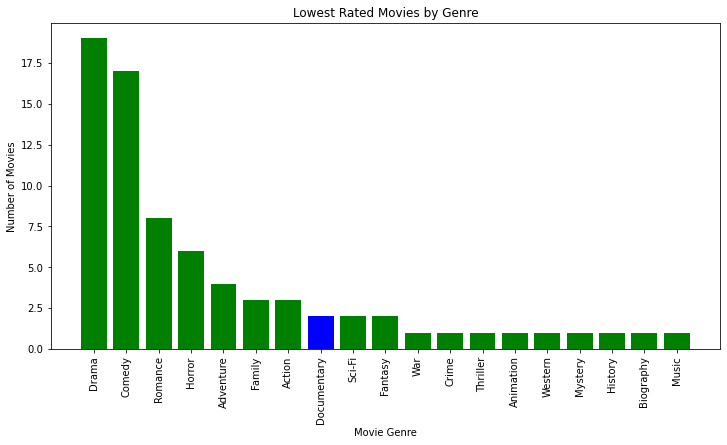

In [45]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x=bottom_genre_counts_df['Genre'], height=bottom_genre_counts_df[0], color=['green', 'green', 'green', 'green', 'green', 'green', 'green', 'blue', 'green', 'green', 'green', 'green', 'green', 'green'])
plt.xticks(rotation = 90)
plt.title('Lowest Rated Movies by Genre')
plt.xlabel('Movie Genre')
plt.ylabel('Number of Movies');

plt.savefig('lowest_genre_graph.png', bbox_inches = "tight", dpi=300)

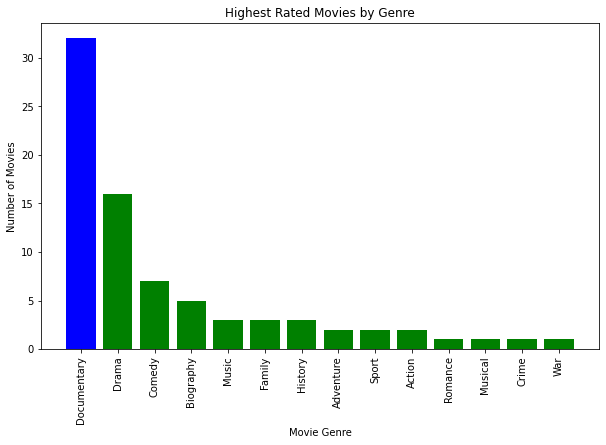

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x=top_genre_counts_df['Genre'], height=top_genre_counts_df[0], color=['blue', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green'])
plt.xticks(rotation = 90)
plt.title('Highest Rated Movies by Genre')
plt.xlabel('Movie Genre')
plt.ylabel('Number of Movies');

plt.savefig('highest_genre_graph.png', bbox_inches = "tight", dpi=300)


I plotted the movie counts for the 50 top rated movies to show that Documentary was the genre with the highest movie count. I also plotted the movie countws for the 50 lowest reated movies to show that Documentaries were not as common in the lowest rated movies.

## Conclusion

Given our analysis, we recommend producing Documentaries $150-$200 million budget. If we are looking to producde a Blockbuster, we should look to release our films in June, July, August, November, and December. If we are not looking to compete with Blockbusters, we recommend releasing in the "off months."
